<a href="https://colab.research.google.com/github/Vasu456/ClusterView-/blob/main/Cluster_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules



In [ ]:
!pip install umap-learn

In [ ]:
!pip install umato


In [3]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install forcelayout
!pip install pyDRMetrics

In [ ]:
!pip install scikit-learn

In [ ]:
import requests
import tarfile
  

# Download and extract the file
url = "https://src.fedoraproject.org/lookaside/pkgs/metis/metis-5.1.0.tar.gz/5465e67079419a69e0116de24fce58fe//metis-5.1.0.tar.gz"
response = requests.get(url, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path=".")

# Change working directory
%cd metis-5.1.0

!make config shared=1 prefix=~/.local/
!make install
!cp ~/.local/lib/libmetis.so /usr/lib/libmetis.so
!export METIS_DLL=/usr/lib/libmetis.so
!pip3 install metis-python

import metispy as metis

In [7]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import forcelayout as fl

In [8]:
import umap.distances as distances
import umap.umap_ as umap
import networkx as nkx
import umato
from pyDRMetrics.pyDRMetrics import *

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
dataset_path = '/content/drive/MyDrive/input files/bank.csv' 
data_ = pd.read_csv(dataset_path)

In [13]:
data_

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.043478,0.025305,0.000000,1.000000,0.000000,0.000000,0.174595,0.866109,0.018911,0.203781,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.463768,0.030183,0.000000,1.000000,0.000000,0.687500,0.389324,0.368201,0.811577,0.877882,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.463768,0.017073,0.096774,1.000000,0.000000,1.000000,0.882309,0.376569,0.997463,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.188406,0.112805,0.032258,1.000000,0.000000,0.333333,0.269684,0.192469,0.156596,0.512287,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.115942,0.057317,0.000000,0.002006,0.166667,0.104167,0.000000,0.811716,0.056965,0.425709,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.405797,0.018293,0.064516,1.000000,0.000000,0.687500,0.389324,0.368201,0.781135,0.877882,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2055,0.217391,0.049390,0.000000,1.000000,0.000000,1.000000,0.669136,0.338912,0.997694,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2056,0.347826,0.037500,0.032258,1.000000,0.000000,0.937500,0.698757,0.602510,0.973939,0.859735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2057,0.333333,0.102439,0.000000,1.000000,0.000000,1.000000,0.669136,0.338912,0.996541,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Penguins

In [ ]:
penguin_data = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")

In [ ]:
penguin_data = penguin_data.dropna()
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
data_ = penguin_data[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
data_ = StandardScaler().fit_transform(data_)

In [ ]:
data_.shape

(333, 4)

## MNIST

In [ ]:
(x_train,y_train),(x_test,y_test)  = mnist.load_data()
# data_ = digits.data
data_ = x_train[50000:60000]
data_ = [i.flatten() for i in data_]

In [ ]:
np.array(data_).shape

(10000, 784)

#Fashion MNIST

In [ ]:
from tensorflow import keras

# Load the Fashion MNIST dataset from the Keras API
(x_train, y_train), _ = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
n_samples = x_train.shape[0]
x_train = x_train.reshape(n_samples, -1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
data_ = x_train

In [ ]:
data_=data_[10000:20000]

In [ ]:
data_.shape

(10000, 784)

# Iris

In [ ]:
dataset = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data_ = dataset[
    [
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",
    ]
].values

In [ ]:
data_.shape

(150, 4)

# Wine

In [ ]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data_ = dataset[
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"
    ]
].values

In [ ]:
data_.shape

(4898, 11)

#Diabetes Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
dataset.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']

In [ ]:
dataset.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
data_ = dataset.iloc[:,:-1].values

In [ ]:
data_.shape

(767, 8)

#Wheat seed Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv')

In [ ]:
dataset.columns = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'KernelGrooveLength', 'Variety']

In [ ]:
dataset.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,KernelGrooveLength,Variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [ ]:
data_ = dataset.iloc[:,:-1].values

In [ ]:
data_.shape

(209, 7)

#Bank data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/datasets/bank-full.csv' 
df = pd.read_csv(dataset_path,sep=';')

In [ ]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data_ = dataset.iloc[:,:-1]
data_ = np.array(pd.get_dummies(data_))

In [ ]:
data_

array([[  58, 2143,    5, ...,    0,    0,    1],
       [  44,   29,    5, ...,    0,    0,    1],
       [  33,    2,    5, ...,    0,    0,    1],
       ...,
       [  72, 5715,   17, ...,    0,    1,    0],
       [  57,  668,   17, ...,    0,    0,    1],
       [  37, 2971,   17, ...,    1,    0,    0]])

In [ ]:
data_.shape

(45211, 51)

# UMAP + Graph Clustering

In [27]:
data_ = StandardScaler().fit_transform(data_)

In [28]:
data_ = np.array(data_)

In [29]:
reducer = umap.UMAP()
reducer.fit(data_)

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
reducerUMATO = umato.UMATO(hub_num=50)
reducerUMATO.fit(data_)

UMATO(a=1.5769434604035877, b=0.8950608780665811, global_n_epochs=100,
      hub_num=50, local_n_epochs=50)

In [30]:
graph = reducer.graph_
print(graph)
ngraph = nkx.Graph(graph)

  (0, 181)	0.14648515
  (0, 285)	0.13025594
  (0, 288)	0.14183585
  (0, 371)	0.16939609
  (0, 373)	0.24883984
  (0, 490)	0.81771445
  (0, 558)	0.14773078
  (0, 588)	0.07834901
  (0, 612)	0.26601145
  (0, 696)	0.10065593
  (0, 1098)	0.09773372
  (0, 1182)	1.0
  (0, 1218)	0.15284948
  (0, 1507)	0.18579988
  (0, 1706)	0.21757756
  (0, 2011)	0.4807118
  (1, 71)	0.2171628
  (1, 366)	0.24607056
  (1, 473)	0.22394098
  (1, 683)	0.361154
  (1, 892)	0.18480536
  (1, 924)	0.1501373
  (1, 1099)	0.18750562
  (1, 1158)	0.22330116
  (1, 1222)	1.0
  :	:
  (2057, 655)	0.1565309
  (2057, 750)	0.5595462
  (2057, 1043)	0.06681901
  (2057, 1147)	0.04901012
  (2057, 1161)	0.24319467
  (2057, 1508)	0.43387982
  (2057, 1654)	0.06225782
  (2057, 1801)	0.061347805
  (2057, 1876)	0.21190833
  (2058, 131)	0.22286986
  (2058, 168)	0.37394
  (2058, 173)	0.11843182
  (2058, 229)	0.10087729
  (2058, 373)	0.106687136
  (2058, 436)	0.1285017
  (2058, 958)	0.0865349
  (2058, 1261)	0.21605186
  (2058, 1340)	0.07482713
 

nparts = 10 for mnist and wine, 3 for iris and penguins

In [31]:
(edgecuts, parts) = metis.part_graph(ngraph, nparts=2)

In [32]:
print(parts)

[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 

In [33]:
def calculateClusterCenter(data,parts):
  centre={}
  for i in range(len(parts)):
    if parts[i] in centre:
      centre[parts[i]]+=data[i]
    else:
      centre[parts[i]]=data[i]


  for j in centre:
    try:
      centre[j]/=parts.count(j)
    except:
      centre[j]=centre[j]/parts.count(j)
  
  return centre

centre = calculateClusterCenter(data_,parts)

In [34]:
embedding = reducer.embedding_

In [ ]:
embeddingUMATO = reducerUMATO.embedding_

In [ ]:
from sklearn.manifold import TSNE
data_=np.array(data_)
embeddingTSNE = TSNE(n_components=2).fit_transform(data_)

In [ ]:
from sklearn.decomposition import PCA
embeddingPCA = PCA(n_components=2).fit_transform(data_)

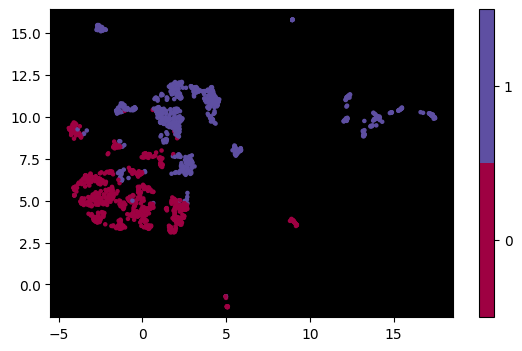

In [35]:
plt.rcParams["figure.figsize"] = (6.5,4)
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(embedding[:, 0], embedding[:, 1], c=parts, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
# plt.title('UMAP projection', fontsize=24);

# Stress Calculation and Translation

In [51]:
from scipy import spatial
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [52]:
def normalize(D):
    scaler = MinMaxScaler()
    D = scaler.fit_transform(D.reshape((-1, 1)))
    D = D.squeeze()
    return D

def normalized_stress(D_high, D_low):
    return np.sqrt(np.sum((D_high - D_low)**2) / np.sum(D_high**2))

In [39]:
def stress2(origData, projData):
  D_low = spatial.distance.pdist(projData, 'euclidean')
  D_high = spatial.distance.pdist(origData, 'euclidean')
  D_low = normalize(D_low)
  D_high = normalize(D_high)
  return normalized_stress(D_high, D_low)

In [55]:
def stress(originalData, projectedData):
  squarePairDistance=0
  numerator=0
  length = len(originalData)
  for i in range(length):
    for j in range(i+1,length):
          original = distances.euclidean(originalData[i],originalData[j])
          projected = distances.euclidean(projectedData[i], projectedData[j])
          squareDifference = (original-projected)**2
          numerator+=squareDifference
          squarePairDistance += original**2

  stress = numerator/squarePairDistance

  return stress

In [40]:
def selectCluster(parts, projectedPoints, cluster):
  clusterPoints=[]
  for i in range(len(parts)):
    if parts[i]==cluster:
      clusterPoints.append(list(projectedPoints[i]))
  return np.array(clusterPoints)

In [41]:
def translate(cluster,axis, distance):
  toAdd = [0,0]
  toAdd[axis] = distance
  return cluster+toAdd

In [42]:
def changeCluster(parts, coordinates, projected, cluster):
  count=0
  newProjected=[]
  for i in range(len(parts)):
    if parts[i]==cluster:
      newProjected.append(coordinates[count])
      count+=1
    else:
      newProjected.append(projected[i])
  return newProjected

In [43]:
def forceDirectedCentres(originalCentres, parts):
  clusterCentres = np.array(originalCentres[0])
  for i in range(1,len(set(parts))):
    clusterCentres=np.vstack((clusterCentres, originalCentres[i]))

  layout = fl.draw_spring_layout(dataset=clusterCentres, algorithm=fl.SpringForce)

  print(layout.get_stress())

  forceDirectedPositions = layout.get_positions()

  return forceDirectedPositions

In [44]:
def PCACentres(originalCentres, parts):
  clusterCentres = np.array(originalCentres[0])
  for i in range(1,len(set(parts))):
    clusterCentres=np.vstack((clusterCentres, originalCentres[i]))

  pcaCoords = PCA(n_components=2).fit_transform(clusterCentres)

  return pcaCoords

In [45]:
def posDifference(highDimensionCentres, lowDimensionCentres, initializer):
  if initializer=="fdl":
    centreRepresentation = forceDirectedCentres(highDimensionCentres, parts)
  elif initializer=="pca":
    centreRepresentation = PCACentres(highDimensionCentres, parts)

  centre2d = np.array(lowDimensionCentres[0])
  for i in range(1,len(set(parts))):
    centre2d=np.vstack((centre2d, lowDimensionCentres[i]))

  return centreRepresentation - centre2d

1.2235286001754477e-16


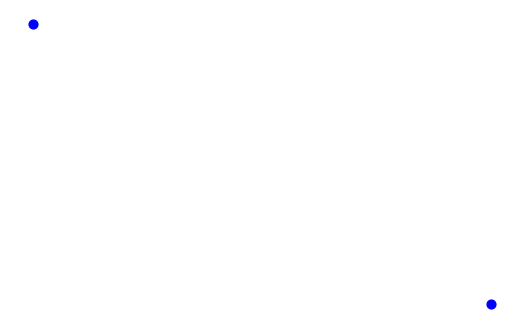

In [47]:
initialCentres = calculateClusterCenter(embedding,parts)

differenceFDL = posDifference(centre, initialCentres, "fdl")
#differencePCA = posDifference(centre, initialCentres, "pca")

In [48]:
def translateUsingDifference(difference, parts, embedding):
  newEmbedding = embedding 
  for i in range(len(difference)):
    x = selectCluster(parts, newEmbedding, i)
    translated = translate(x, 0, difference[i][0])
    newEmbedding = changeCluster(parts, translated, newEmbedding, i)

    y = selectCluster(parts, newEmbedding, i)
    translated = translate(y, 1, difference[i][1])
    newEmbedding = changeCluster(parts, translated, newEmbedding, i)

  return newEmbedding

In [57]:
print("Original stress: ", stress2(data_, embedding))

translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding)
#translatedEmbeddingPCA = translateUsingDifference(differencePCA, parts, embedding)

print("ClusterView stress using FDL: ", stress2(data_,translatedEmbeddingFDL))
#print("ClusterView stress using PCA: ", stress(data_,translatedEmbeddingPCA))

Original stress:  0.982260900201628
ClusterView stress using FDL:  0.847860004841531


In [58]:
print("Original stress: ", stress(data_, embedding))

translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding)
#translatedEmbeddingPCA = translateUsingDifference(differencePCA, parts, embedding)

print("ClusterView stress using FDL: ", stress(data_,translatedEmbeddingFDL))
#print("ClusterView stress using PCA: ", stress(data_,translatedEmbeddingPCA))

Original stress:  0.23474925610600214
ClusterView stress using FDL:  0.31177958937986483


In [ ]:
print("UMATO stress: ", stress(data_, embeddingUMATO))
print("TSNE stress: ", stress(data_, embeddingTSNE))
print("PCA stress: ", stress(data_, embeddingPCA))

UMATO stress:  0.9573600652195654
TSNE stress:  1.029446813183858
PCA stress:  0.225041688522829


In [ ]:
translatedEmbeddingFDL = np.array(translatedEmbeddingFDL)

In [ ]:
data_ = np.array(data_)

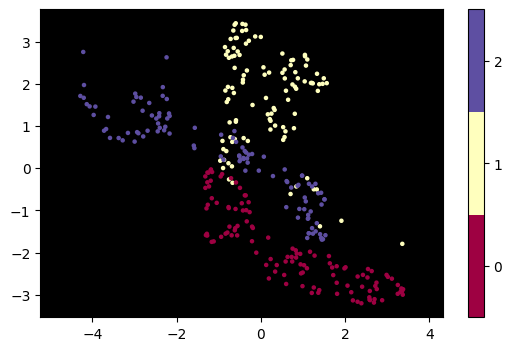

In [ ]:
plt.rcParams["figure.figsize"] = (6.5,4)
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(translatedEmbeddingFDL[:, 0], translatedEmbeddingFDL[:, 1], c=parts, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
# plt.title('UMAP projection after translation', fontsize=24);

In [ ]:
from pyDRMetrics.coranking_matrix import *
from sklearn.metrics import pairwise_distances

def TandC(X,Z):
  df = pd.DataFrame(X, index=None)
  D = pd.DataFrame(pairwise_distances(df.values)).values
  dfz = pd.DataFrame(Z, index=None)
  Dz = pd.DataFrame(pairwise_distances(dfz.values)).values

  R = ranking_matrix(D)
  Rz = ranking_matrix(Dz)
  Q = coranking_matrix(R, Rz)

  Q = Q[1:,1:]
  m = len(Q)

  # T = np.zeros(m-1) # trustworthiness
  # C = np.zeros(m-1) # continuity

  Qs = Q[7:,:7]
  W = np.arange(Qs.shape[0]).reshape(-1, 1) # a column vector of weights. weight = rank error = actual_rank - k
  T = 1-np.sum(Qs * W)/(7+1)/m/(m-1-7)  # 1 - normalized hard-k-intrusions. lower-left region. weighted by rank error (rank - k)
  Qs = Q[:7,7:]
  W = np.arange(Qs.shape[1]).reshape(1, -1) # a row vector of weights. weight = rank error = actual_rank - k
  C = 1-np.sum(Qs * W)/(7+1)/m/(m-1-7)  # 1 - normalized hard-k-extrusions. upper-right region 

  return (T,C)

In [ ]:
plt.rcParams["figure.figsize"] = (6.5,4)

drm = TandC(data_, embedding)
newDrm = TandC(data_, translatedEmbeddingFDL)
newDrm2 = TandC(data_, translatedEmbeddingPCA)
umatoDrm = TandC(data_, embeddingUMATO)
tsneDrm = TandC(data_, embeddingTSNE)
pcaDrm = TandC(data_, embeddingPCA)
# x = [l for l in range(len(drm.T))]

# initialT = drm.T[7]
# finalT = newDrm.T[7]
# umatoT = umatoDrm.T[7]
# tsneT = tsneDrm.T[7]
# pcaT = pcaDrm.T[7]

# initialC = drm[0]
# finalC = newDrm.C
# umatoC = umatoDrm.C

print("Trustworthiness of UMAP: ",drm[0])
print("Trustworthiness of Translation FDL: ",newDrm[0])
print("Trustworthiness of Translation PCA: ",newDrm2[0])
print("Trustworthiness of UMATO: ",umatoDrm[0])
print("Trustworthiness of TSNE: ",tsneDrm[0])
print("Trustworthiness of PCA: ",pcaDrm[0])

print("\nContinuity of UMAP: ",drm[1])
print("Continuity of Translation FDL: ",newDrm[1])
print("Continuity of Translation PCA: ",newDrm2[1])
print("Continuity of UMATO: ",umatoDrm[1])
print("Continuity of TSNE: ",tsneDrm[1])
print("Continuity of PCA: ",pcaDrm[1])

# plt.plot(x, initialT, linestyle='dotted')
# plt.plot(x, umatoT, color='blue', linestyle='dashed')
# plt.plot(x, finalT, color='blue')

# # plt.plot(x, initialC, linestyle='dotted', color='red')
# # plt.plot(x, umatoC, color='red', linestyle='dashed')
# # plt.plot(x, finalC, color='red')


# # plt.legend(["UMAP Trustworthiness", "UMATO Trustworthiness", "Translation Trustworthiness"])
# # plt.xlabel("Number of neighbours")
# # plt.ylabel("Trustworthiness")

# plt.legend(["UMAP", "UMATO", "Translation"], loc="lower right")
# plt.xlabel("Number of neighbours")
# plt.ylabel("Trustworthiness")

# # plt.legend(["Initial Trustworthiness","Final Trustworthiness","Initial Continuity","Final Continuity"], loc ="lower right")

# plt.show()

Trustworthiness of UMAP:  0.9701280044429226
Trustworthiness of Translation FDL:  0.9705108760300513
Trustworthiness of Translation PCA:  0.9705854405878982
Trustworthiness of UMATO:  0.8114360204912494
Trustworthiness of TSNE:  0.9868382331677268
Trustworthiness of PCA:  0.8889491028474281

Continuity of UMAP:  0.9888063999073313
Continuity of Translation FDL:  0.9729513825669425
Continuity of Translation PCA:  0.9720787375004141
Continuity of UMATO:  0.9171092279381076
Continuity of TSNE:  0.987394978613065
Continuity of PCA:  0.9745310758680712


## Polar Coordinates (Shrinking)

In [ ]:
clusterCentres=calculateClusterCenter(translatedEmbeddingFDL)

In [ ]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [ ]:
newCoordinates=[]
for i in range(len(parts)):
  (rho, alpha) =cart2pol(clusterCentres[parts[i]][0],clusterCentres[parts[i]][1])
  (r, theta)=cart2pol(translatedEmbeddingFDL[i][0],translatedEmbeddingFDL[i][1])
  R = np.sqrt((r**2)+(rho**2)-(2*rho*r*np.cos(theta-alpha)))
  if R!=0:
    omega = np.arcsin((r/R)*(np.sin(theta-alpha)))
    newR=0.95*R
    originDistance = np.sqrt((newR**2)+(rho**2)+(2*rho*newR*np.cos(omega)))
    originAngle = np.arcsin((newR/originDistance)*(np.sin(omega)))
    (x,y)= pol2cart(originDistance, originAngle)
    coordinate = np.array([x,y])
    newCoordinates.append(coordinate)
  else:
    newCoordinates.append(clusterCentres[parts[i]])

newCoordinates = np.array(newCoordinates)

#Global Loss Function

In [ ]:
def globalloss(originalData, projectedData):
  numerator=0
  length = len(originalData)
  for i in range(length):
    for j in range(i+1,length):
          original = distances.euclidean(originalData[i],originalData[j])
          projected = distances.euclidean(projectedData[i], projectedData[j])
          squareDifference = (original-projected)**2
          numerator+=squareDifference
          
  global_loss = numerator

  return global_loss

In [ ]:
import random
original_data = data_
projected_data = embedding 
sample_size = int(len(original_data) * 0.01)
random_indices = random.sample(range(len(original_data)), sample_size)
sampled_original_data = [original_data[i] for i in random_indices]
sampled_projected_data = [projected_data[i] for i in random_indices]

In [ ]:
print(globalloss(sampled_original_data,sampled_projected_data))

331.1071216260096
